<a href="https://colab.research.google.com/github/MoemenGaafar/World-Happiness-Machine-Learning/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition and Motivation 

In this project, we will use machine learning methods to quantitatively define the main factors affecting humans’ subjective sense of happiness and thus develop a method to predict happiness. Besides sating thousands of years of human curiosity, the results of this project could aid in the sustainable development of the lives of communities and nations. We will specifically  seek to understand the causal effect of demographic, economic, political, and social influences on humans’ sense of happiness.

# The Dataset

To this end, we will use the UN’s World Happiness Report (WHR) datasets created over the years 2005 till 2020. The WHR data is created by taking the average per nation of data collected through the Gallup World Poll survey, which correlates demographic, economic, political, and social factors with real-world outcomes.

The Gallup World Poll (GWP) is conducted yearly in at least 153 countries with a random sample of at least 1000 respondents in each country.

Our compiled dataset could be found here: https://drive.google.com/file/d/1Bco5x4ciSbjeqhE7w0qJRihlssUSZL89/view?usp=sharing

# The Project's Steps

Since these datasets were created across different years, we will initially have to perform intensive data cleaning and preprocessing to figure out the most influential attributes on the subjective happiness (referred to in the WHR as the Life Ladder).

This is a regression problem so the first algorithm that comes to mind to tackle it is Linear Regression. We will apply linear regression using ridge and lasso regularization and tune their hyperparameters with k-fold cross validation. We will also try to apply linear regression after using PCA and RFE to filter out our features. We will also apply one or more neural network models along with KNN and decision tree regression. We will try to achieve better  performances by applying techniques of bootstrapping and boosting several models. 

We generally aim at an R2 score of 0.9. After determining the best algorithm to use, our project will quantitatively display the demographic, economic, political, and social factors that affect human happiness and will be able to receive the attributes belonging to some country and predict its average Life Ladder.

# The Dataset's Features 

Each entry in the dataset is labeled by a country and a year. These two features are merely labels and hence are of no importance to our algorithm and will be ignored. The remaining features are: 

1. **Subjective Happiness (named Ladder in the dataset):** this is a measure of average subjective happiness on a scale from 0 to 10 where 0 is least happy and 10 is most happy. This is our target feature.
2. **Log GDP per capita (LogGDP)**: this is the log of each entry's gross domestic product divided by its population. The GDPs are retrieved from data created by the World Bank. 
3. **Social support (SocialSupport)**: this is the average of responses to the question "Do you have someone to count on in times of trouble?". In the GWP, this question was answered by either 0 or 1, thus the averaged values in our dataset per country are in the range 0 to 1. 
4. **Healthy life expectancy at birth (HealthyLifeExpectency)**: this is each entry's average life expectancy in good health. This data was extracted from reports by the World Health Organization. 
5. **Freedom to make life choices (Freedom)**: this is the average of responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”. As in the social support feature, the values are in the range 0 to 1. 
6. **Generosity (Generosity)**: this is the residual (the vertical distance between a data point and the regression line) of regressing national average of responses to “Have you donated money to a charity in the past month?” on GDP
per capita. This feature thus ranges from -1 to 1. (To clarify this feature's significance, a residual is the error that isn't explained by the regression line, thus generosity is the donations or their lack that do not fit into the expected donations vs. GDP regression line.)
7. **Perception of corruption (Corruption)**: this is the average of responses to the question “Is corruption widespread throughout the government or not?” and the question “Is corruption widespread within businesses or not?” . The two questions are averaged for each GWP respondent to produce a value of either 0, 0.5, or 1, thus the range of this feature is 0 to 1. 
8. **Positive affect (PositiveAffect)**: this feature represents the average of whether respondents experienced laughter or enjoyment a lot during the past day. The range is again from 0 to 1. 
9. **Negative affect (NegativeAffect)**: this feature represents the average of whether respondents experienced worry, sadness, or anger a lot during the past day. The range is from 0 to 1.

***Note***: As explained above, most of this data is collected through surveys and is thus mainly subjective. That is, when we refer to happiness or corruption below, we mean the averaged person's perception of his or her own happiness or the averaged person's perception of corruption in the governmnet or in businesses
 




# Import all libraries we might need

In [ ]:
import numpy as np
import pandas as pd
import itertools
import copy

import random
random.seed(0)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

from statistics import mean

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor


from math import log2, sqrt, isnan
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from keras import backend as K
from keras import callbacks

from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

!pip3 install ann_visualizer
from ann_visualizer.visualize import ann_viz
from graphviz import Source

from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive')


  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=da9b8e4f6fbdb2aea0aee15d6a64f91e5e30adff7e9871e0516bc536a53595f6
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer
Mounted at /content/drive


# Import the data set

To import the dataset automatically, kindly upload the dataset to your Google Drive and authenticate Colab to access it. 

In [ ]:
data = pd.read_csv('drive/MyDrive/WHR.csv')

In [ ]:
data.head()

,Country,year,Ladder,LogGDP,SocialSupport,HealthyLifeExpectancy,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,0.267919


The dataset is imported successfully.

# Data Exploration

In [ ]:
data.describe()

,year,Ladder,LogGDP,SocialSupport,HealthyLifeExpectancy,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect
count,1848.000000,1848.000000,1819.000000,1835.000000,1796.000000,1817.000000,1765.000000,1745.000000,1827.000000,1833.000000
mean,2012.848485,5.445810,9.244531,0.811132,63.169525,0.738467,0.000109,0.749064,0.709623,0.267208
std,3.962437,1.118989,1.168422,0.118987,7.546524,0.143059,0.163220,0.186156,0.108186,0.085197
min,2005.000000,2.375092,6.456574,0.290184,32.299999,0.257534,-0.331775,0.035198,0.321690,0.083426
25%,2010.000000,4.623136,8.309359,0.748296,58.299999,0.643062,-0.117175,0.692724,0.623345,0.205950
50%,2013.000000,5.363165,9.407829,0.833975,65.099998,0.757478,-0.023724,0.803634,0.720842,0.255774
75%,2016.000000,6.268130,10.209482,0.904574,68.384998,0.852387,0.091154,0.873649,0.801082,0.317995
max,2019.000000,8.018934,11.728235,0.987343,77.099998,0.985178,0.679921,0.983276,0.943621,0.704590


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1848 non-null   object 
 1   year                   1848 non-null   int64  
 2   Ladder                 1848 non-null   float64
 3   LogGDP                 1819 non-null   float64
 4   SocialSupport          1835 non-null   float64
 5   HealthyLifeExpectancy  1796 non-null   float64
 6   Freedom                1817 non-null   float64
 7   Generosity             1765 non-null   float64
 8   Corruption             1745 non-null   float64
 9   PositiveAffect         1827 non-null   float64
 10  NegativeAffect         1833 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 158.9+ KB


We see that there are some null values in some features. Thus, data cleaning is essential. The means of the features range on various scales so, normalization and standardization might be needed for training some models.

### How does healthy life expectancy affect the happiness ladder?

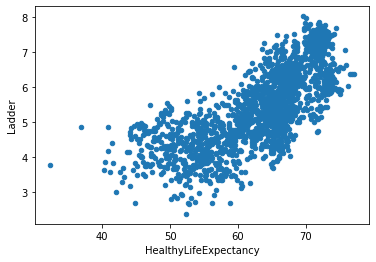

In [ ]:
data.plot.scatter(x= 'HealthyLifeExpectancy', y='Ladder')

So health and happiness vary proportionally :)

### How does the average GDP affect the happiness Ladder?

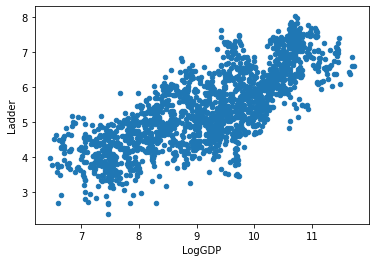

In [ ]:
data.plot.scatter(x= 'LogGDP', y='Ladder')

... and so do wealth and happiness.

### How does freedom affect the happiness ladder? 

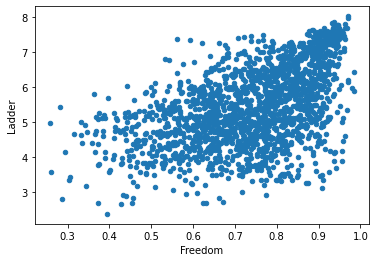

In [ ]:
data.plot.scatter(x= 'Freedom', y='Ladder')


Freedom is also generally positively correlated with happiness, yet not as strongly as healthy life expectancy or GDP are. 

### How does the perception of corruption affect happiness?

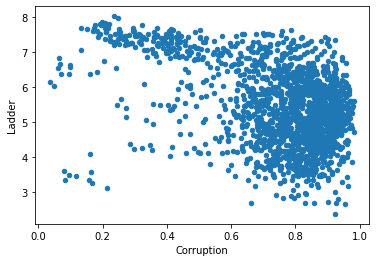

In [ ]:
data.plot.scatter(x= 'Corruption', y='Ladder')

Corruption and happiness are negatively correlated in countries with low levels of corruption perception. There is no apparent effect for coutries with a high corruption perception. 

### How does generosity affect happiness?

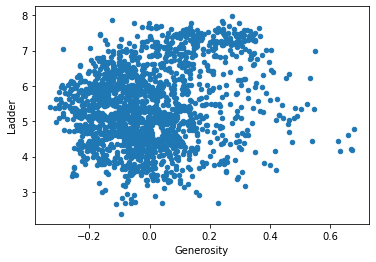

In [ ]:
data.plot.scatter(x= 'Generosity', y='Ladder')

There is no apparent correlation between happiness and generosity. (yet on a side note, people in the world **really** need to work on their generosity :"D)

### How does social support affect happiness?

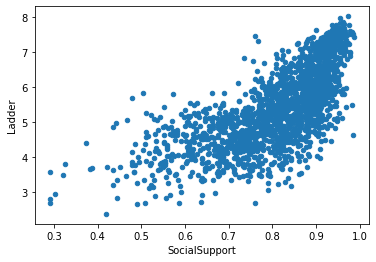

In [ ]:
data.plot.scatter(x= 'SocialSupport', y='Ladder')

### How does positive affect affect happiness?

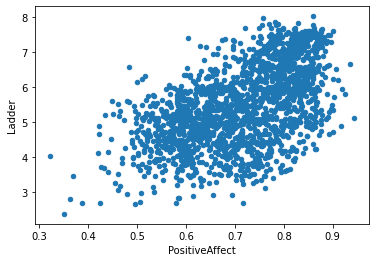

In [ ]:
data.plot.scatter(x= 'PositiveAffect', y='Ladder')

Expectedly, happiness is posistively affected by the positive affect (whether people experienced laughter or enjoyment a lot in the past day). Unexpectedly, the correlation is not that strong. 

### Now, how does negative affect affect happines?

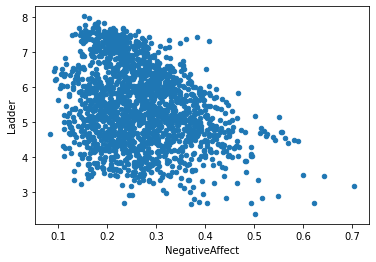

In [ ]:
data.plot.scatter(x= 'NegativeAffect', y='Ladder')

While there seems to be a general negative correlation between happiness and the negative affect, the correlation is not quite strong. 

### On a slightly different pursuit, how are healthy life expectancy and GDP correlated?

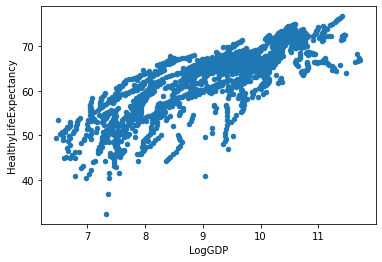

In [ ]:
data.plot.scatter(x= 'LogGDP', y='HealthyLifeExpectancy')

Here again health and wealth are positively correlated!

### How are positive affect and negative affect correlated? 

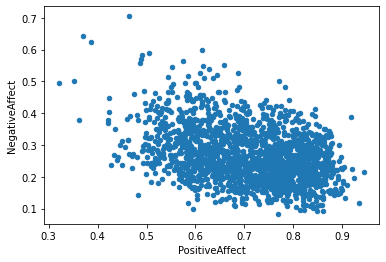

In [ ]:
data.plot.scatter(x= 'PositiveAffect', y='NegativeAffect')

There seems to be an overall small negative correlation between positive affect and negative affect. 

### How are GDP and the perception of corruption correlated? 

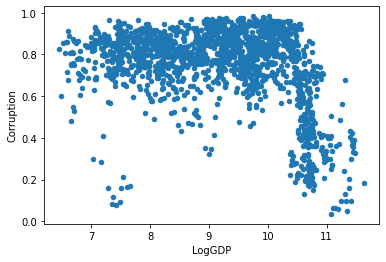

In [ ]:
data.plot.scatter(x= 'LogGDP', y='Corruption')

Ah well, apparently the world has a high perception of their governments' and businesses' corruption, except in countries with the highest GDPs. No correlation could be seen. 

### How are generosity and corruption correlated? 

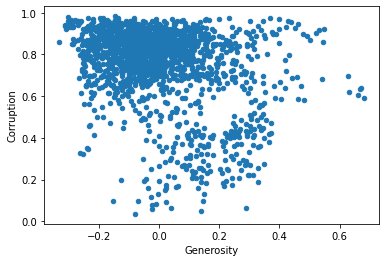

In [ ]:
data.plot.scatter(x= 'Generosity', y='Corruption')

Again, there seems to be no correlation. 

### How does GDP affect generosity? 

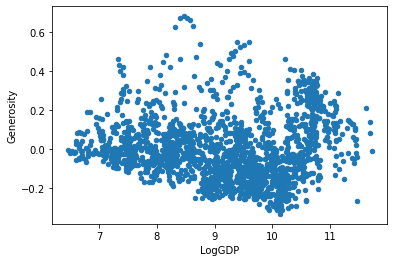

In [ ]:
data.plot.scatter(x= 'LogGDP', y='Generosity')

:)

Apparently generosity and GDP are generally negatively correlated. 

### What is the distribution of GPD in the dataset?

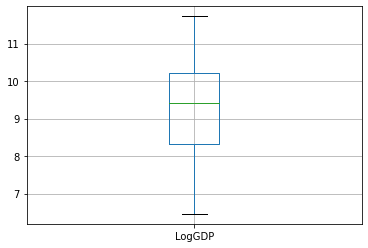

In [ ]:
data.boxplot(column = 'LogGDP')

Most countries have a lower than average LogGDP

### What is the distribution of healthy life expectancy in the dataset?

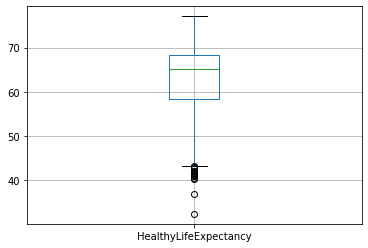

In [ ]:
data.boxplot(column = 'HealthyLifeExpectancy')

Again, most countries have lower scores than average. 

# Data Cleaning 

### First, we drop the country and year features, since as stated above, they are mere labels. 

In [ ]:
data.drop(columns= ['Country','year'], axis = 1, inplace = True)

### Missing values

We check how many of the cells have null values and what percent of each feature is null to later determine how we will deal with them.

In [ ]:
data.isnull().sum()

Ladder                     0
LogGDP                    29
SocialSupport             13
HealthyLifeExpectancy     52
Freedom                   31
Generosity                83
Corruption               103
PositiveAffect            21
NegativeAffect            15
dtype: int64

In [ ]:
for col in data.columns:
  print(col,  ': %.2f%%' %((data[col].isnull().sum()/data.shape[0])*100))

Ladder : 0.00%
LogGDP : 1.57%
SocialSupport : 0.70%
HealthyLifeExpectancy : 2.81%
Freedom : 1.68%
Generosity : 4.49%
Corruption : 5.57%
PositiveAffect : 1.14%
NegativeAffect : 0.81%


All of our features except the the Ladder have missing values.

Since only a few of the social support, negative affect, and positive affect values are missing, we will drop the entries where they are null to avoid any unnecesary added error. 

In [ ]:
data = data[data['SocialSupport'].notna()]
data = data[data['PositiveAffect'].notna()]
data = data[data['NegativeAffect'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 1847
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ladder                 1823 non-null   float64
 1   LogGDP                 1794 non-null   float64
 2   SocialSupport          1823 non-null   float64
 3   HealthyLifeExpectancy  1772 non-null   float64
 4   Freedom                1800 non-null   float64
 5   Generosity             1748 non-null   float64
 6   Corruption             1731 non-null   float64
 7   PositiveAffect         1823 non-null   float64
 8   NegativeAffect         1823 non-null   float64
dtypes: float64(9)
memory usage: 142.4 KB


For the remaining features, we fill the null values with the mean of the k nearest neighbors. 

We pick k to be 40 (approximately equal to square root n) and we use the default distance metric (euclidean distance) and the default weights for the chosen neighbors (uniform weights). 


In [ ]:
imputer = KNNImputer(n_neighbors=40, copy = False) # copy is set to False to make imputation happen in place
imputer.fit_transform(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 1847
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ladder                 1823 non-null   float64
 1   LogGDP                 1823 non-null   float64
 2   SocialSupport          1823 non-null   float64
 3   HealthyLifeExpectancy  1823 non-null   float64
 4   Freedom                1823 non-null   float64
 5   Generosity             1823 non-null   float64
 6   Corruption             1823 non-null   float64
 7   PositiveAffect         1823 non-null   float64
 8   NegativeAffect         1823 non-null   float64
dtypes: float64(9)
memory usage: 142.4 KB


We see that the KNN Imputer did its job successfully.

### Correlation with target feature

In [ ]:
data.corr()['Ladder']

Ladder                   1.000000
LogGDP                   0.777811
SocialSupport            0.705006
HealthyLifeExpectancy    0.743544
Freedom                  0.523582
Generosity               0.198328
Corruption              -0.422120
PositiveAffect           0.538130
NegativeAffect          -0.294855
Name: Ladder, dtype: float64

All features seem correlated with our target feature, thus we will drop none.

# Split the data

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:, 0]
X.head()

,LogGDP,SocialSupport,HealthyLifeExpectancy,Freedom,Generosity,Corruption,PositiveAffect,NegativeAffect
0,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195
1,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092
2,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324
3,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,0.267175
4,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,0.267919


Split the X and y into training and test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# LEARNING AT LAST!!!

## Linear Regression 

In this step, we will apply linear regression with no regularization or feature selection. We will then apply it with ridge regularization, lasso regularization, principal component analysis feature selection, and recursive feature selection. 

### Scaling Features

According to source [1], when applying feature scaling, standardization is prefered for features following a gaussian distribution and normalization is prefered for those who do not. From the above exploration, we know that most of our features do not follow a gaussian distribution, so we use normalization. 

In [ ]:
scaler = Normalizer().fit(X_train) 
LR_X_train = scaler.transform(X_train) 
LR_X_test = scaler.transform(X_test) 


### Standard Linear Regression

We apply standard linear regression with no regularization or feature selection. 

In [ ]:
reg = LinearRegression().fit(LR_X_train, y_train)
y_pred = reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Standard linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Standard linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Standard linear regression R2 =  0.48873839420667 

Standard linear regression coefficients :
LogGDP : 153.9730857781291
SocialSupport : 115.06405644698373
HealthyLifeExpectancy : 921.2499782888378
Freedom : -22.915692418891027
Generosity : 40.08756105135298
Corruption : -164.35673877677604
PositiveAffect : -3.1678033968914434
NegativeAffect : -149.33483635801122


### Ridge Regression

In [ ]:
ridge_reg = Ridge().fit(LR_X_train, y_train)
y_pred = ridge_reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.014667384354728141 

Ridge linear regression coefficients :
LogGDP : 153.9730857781291
SocialSupport : 115.06405644698373
HealthyLifeExpectancy : 921.2499782888378
Freedom : -22.915692418891027
Generosity : 40.08756105135298
Corruption : -164.35673877677604
PositiveAffect : -3.1678033968914434
NegativeAffect : -149.33483635801122


The results are worse than those of standard regression so we apply Ridge Regression with hyperparameter tuning. (The standard sklearn RidgeCV function applies leave-one-out cross validation by default)

In [ ]:
ridge_reg = RidgeCV(alphas = [0.1, 1, 10, 100, 500, 1000, 10000]).fit(LR_X_train, y_train) 
print("Best alpha = ", ridge_reg.alpha_)


Best alpha =  0.1


In [ ]:
ridge_reg = RidgeCV(alphas = [0.001, 0.01, 0.1, 0.2]).fit(LR_X_train, y_train) 
print("Best alpha = ", ridge_reg.alpha_)

Best alpha =  0.001


Ridge Regression with round II of tuning:

In [ ]:
ridge_reg = RidgeCV(alphas = np.arange(0.0001, 0.09, 0.00001).tolist()).fit(LR_X_train, y_train) 
print("Best alpha = ", ridge_reg.alpha_)

Best alpha =  0.0001


Round III because why not :)

In [ ]:
ridge_reg = RidgeCV(alphas = np.arange(0.0000001, 0.0009, 0.0000001).tolist()).fit(LR_X_train, y_train) 
print("Best alpha = ", ridge_reg.alpha_)

Best alpha =  9.6e-06


So finally from Ridge Reggresion we get:

In [ ]:
ridge_reg = Ridge(alpha = 9.6e-06 ).fit(LR_X_train, y_train)
y_pred = ridge_reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = ridge_reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.4837458643488014 

Ridge linear regression coefficients :
LogGDP : 114.63681809982639
SocialSupport : 111.81188171248449
HealthyLifeExpectancy : 663.0978662943514
Freedom : -25.41533524750836
Generosity : 40.15198101017212
Corruption : -168.55782091434645
PositiveAffect : -11.54938368174922
NegativeAffect : -152.3426810989076


### Lasso Regression

In [ ]:
lasso_reg = Lasso().fit(LR_X_train, y_train)
y_pred = lasso_reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  -0.0025025023132878577 

Lasso linear regression coefficients :
LogGDP : 153.9730857781291
SocialSupport : 115.06405644698373
HealthyLifeExpectancy : 921.2499782888378
Freedom : -22.915692418891027
Generosity : 40.08756105135298
Corruption : -164.35673877677604
PositiveAffect : -3.1678033968914434
NegativeAffect : -149.33483635801122


We again try hyperparameter tuning.

In [ ]:
lasso_reg = LassoCV(alphas = [0.1, 1, 10, 100, 500, 1000, 10000]).fit(LR_X_train, y_train) 
print("Best alpha = ", lasso_reg.alpha_)

Best alpha =  10000.0


In [ ]:
lasso_reg = LassoCV(alphas = np.arange(1000, 10000, 1).tolist()).fit(LR_X_train, y_train) 
print("Best alpha = ", lasso_reg.alpha_)

Best alpha =  9999


In [ ]:
lasso_reg = Lasso(alpha = 9999).fit(LR_X_train, y_train)
y_pred = lasso_reg.predict(LR_X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  -0.0025025023132878577 

Lasso linear regression coefficients :
LogGDP : 153.9730857781291
SocialSupport : 115.06405644698373
HealthyLifeExpectancy : 921.2499782888378
Freedom : -22.915692418891027
Generosity : 40.08756105135298
Corruption : -164.35673877677604
PositiveAffect : -3.1678033968914434
NegativeAffect : -149.33483635801122


And thus, we back away quitely...

### Because of the (so far) dreadfulness of our results, we take a step back and try a different approach for missing values.

We simply drop the null values instead of imputing them.

In [ ]:
data2 = pd.read_csv('drive/MyDrive/WHR.csv')
data2.drop(columns= ['Country','year'], axis = 1, inplace = True)
data2 = data2.dropna()
X2 = data.iloc[:,1:]
y2 = data.iloc[:, 0]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 101)
scaler2 = Normalizer().fit(X2_train) 
LR_X2_train = scaler2.transform(X2_train) 
LR_X2_test = scaler2.transform(X2_test) 
reg = LinearRegression().fit(LR_X2_train, y2_train) 
y_pred = reg.predict(LR_X2_test)
r2 = r2_score(y2_test, y_pred)
print("Standard Linear Regression Round II, R2 = ", r2, "\n")



Standard Linear Regression Round II, R2 =  0.48873839420667 



In [ ]:
lasso_reg = LassoCV(alphas = np.arange(1000, 10000, 1).tolist()).fit(LR_X2_train, y2_train) 
y_pred = lasso_reg.predict(LR_X2_test)
r2 = r2_score(y2_test, y_pred)
print("Best alpha = ", lasso_reg.alpha_)
print("Lasso Linear Regression Round II, R2 = ", r2, "\n")

Best alpha =  9999
Lasso Linear Regression Round II, R2 =  -0.0025025023132878577 



We stick with our more fun KNN-imputed data.

**Back to Learning**

We now attempt linear regression using principal component analiysis (PCA) feature selection and recursive feature elimination (RFE).

###PCA Linear Regression

We split the training data into test and validation data, then iteratively create 1 to 8 principal components. We pick the number of components that performs best in linear regression and test it on the test data. 

In [ ]:
LRPCA_X_train, LRPCA_X_val, LRPCA_y_train, LRPCA_y_val = train_test_split(LR_X_train, y_train, test_size = 0.3, random_state = 101)


In [ ]:
r2_picked = 0
for i in np.arange(1, 8, 1).tolist():
  pca = PCA(n_components=i)
  pca_model = pca.fit(LRPCA_X_train)
  pc = pca_model.transform(LRPCA_X_train)
  reg = LinearRegression().fit(pc, LRPCA_y_train)
  val_pc = pca.transform(LRPCA_X_val)
  y_pred = reg.predict(val_pc)
  r2 = r2_score(LRPCA_y_val, y_pred)
  if r2 > r2_picked:
    features_count = i
    r2_picked = r2

print("PC count = ", features_count, "\n")


PC count =  6 



In [ ]:
pca = PCA(n_components=6)
pca_model = pca.fit(LRPCA_X_train)
pc = pca_model.transform(LRPCA_X_train)
test_pc = pca_model.transform(LR_X_test)
reg = LinearRegression().fit(pc, LRPCA_y_train)
y_pred = reg.predict(test_pc)
r2 = r2_score(y_test, y_pred)
print("PCA linear regression R2 = ", r2, "\n")

PCA linear regression R2 =  0.46136041439652586 



Since this approach does not give the best Linear Regression results, we will not explore its principal components further. 

### Rescaling Features

We take a second step back and test linear regression without normalization, and with standardization.

**With neither normalization nor standardization**

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Standard linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Standard linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Standard linear regression R2 =  0.760559007569457 

Standard linear regression coefficients :
LogGDP : 0.342489451548883
SocialSupport : 2.0930751418445137
HealthyLifeExpectancy : 0.02769824399428389
Freedom : 0.4942167348260645
Generosity : 0.4320526784043755
Corruption : -0.6380878708714015
PositiveAffect : 1.7801785707393012
NegativeAffect : 0.09116544393685434


**With standardization**

In [ ]:
scaler = StandardScaler().fit(X_train) 
S_X_train = scaler.transform(X_train) 
S_X_test = scaler.transform(X_test) 

In [ ]:
reg = LinearRegression().fit(S_X_train, y_train)
y_pred = reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Standard linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Standard linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Standard linear regression R2 =  0.7605590075694585 

Standard linear regression coefficients :
LogGDP : 0.3956963987589417
SocialSupport : 0.25185293335633524
HealthyLifeExpectancy : 0.20995529824571735
Freedom : 0.07077083209899611
Generosity : 0.06910445609437851
Corruption : -0.11696266386826576
PositiveAffect : 0.1936845582189926
NegativeAffect : 0.007735313462046325


So we start regression all over again using standardization instead of normalization. (Why here is a way too tricky question)

###Ridge Regression II

In [ ]:
ridge_reg = Ridge().fit(S_X_train, y_train)
y_pred = ridge_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.7605402300125654 

Ridge linear regression coefficients :
LogGDP : 0.3956963987589417
SocialSupport : 0.25185293335633524
HealthyLifeExpectancy : 0.20995529824571735
Freedom : 0.07077083209899611
Generosity : 0.06910445609437851
Corruption : -0.11696266386826576
PositiveAffect : 0.1936845582189926
NegativeAffect : 0.007735313462046325


In [ ]:
ridge_reg = RidgeCV(alphas = [0.1, 1, 10, 100, 500, 1000, 10000]).fit(S_X_train, y_train) 
print("Best alpha = ", ridge_reg.alpha_)

Best alpha =  10.0


In [ ]:
ridge_reg = RidgeCV(alphas = np.arange(1, 100, 1).tolist()).fit(S_X_train, y_train) 
print("Best alpha = ", ridge_reg.alpha_)

Best alpha =  27


In [ ]:
ridge_reg = RidgeCV(alphas = np.arange(25, 30, 0.01).tolist()).fit(S_X_train, y_train) 
print("Best alpha = ", ridge_reg.alpha_)

Best alpha =  26.650000000000258


In [ ]:
ridge_reg = Ridge(alpha = 26.65 ).fit(S_X_train, y_train)
y_pred = ridge_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = ridge_reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.7599694777738583 

Ridge linear regression coefficients :
LogGDP : 0.38127311194993807
SocialSupport : 0.2509176942618367
HealthyLifeExpectancy : 0.21782939698503742
Freedom : 0.07455806768579115
Generosity : 0.06770145407832504
Corruption : -0.11631607127877337
PositiveAffect : 0.1893400390029546
NegativeAffect : 0.004485253301851723


###Lasso Regression II

In [ ]:
lasso_reg = Lasso().fit(S_X_train, y_train)
y_pred = lasso_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  -0.0025025023132878577 

Lasso linear regression coefficients :
LogGDP : 0.3956963987589417
SocialSupport : 0.25185293335633524
HealthyLifeExpectancy : 0.20995529824571735
Freedom : 0.07077083209899611
Generosity : 0.06910445609437851
Corruption : -0.11696266386826576
PositiveAffect : 0.1936845582189926
NegativeAffect : 0.007735313462046325


We try lasso regression with non-standardized nor normalized data:

In [ ]:
lasso_reg = Lasso().fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  0.5402839068938041 

Lasso linear regression coefficients :
LogGDP : 0.3956963987589417
SocialSupport : 0.25185293335633524
HealthyLifeExpectancy : 0.20995529824571735
Freedom : 0.07077083209899611
Generosity : 0.06910445609437851
Corruption : -0.11696266386826576
PositiveAffect : 0.1936845582189926
NegativeAffect : 0.007735313462046325


Since this too produces bad results, we stick with using standardized data. 

###PCA Linear Regression II

In [ ]:
SPCA_X_train, SPCA_X_val, SPCA_y_train, SPCA_y_val = train_test_split(S_X_train, y_train, test_size = 0.3, random_state = 101)

In [ ]:
r2_picked = 0
for i in np.arange(1, 8, 1).tolist():
  pca = PCA(n_components=i)
  pca_model = pca.fit(SPCA_X_train)
  pc = pca_model.transform(SPCA_X_train)
  reg = LinearRegression().fit(pc, SPCA_y_train)
  val_pc = pca.transform(SPCA_X_val)
  y_pred = reg.predict(val_pc)
  r2 = r2_score(SPCA_y_val, y_pred)
  if r2 > r2_picked:
    features_count = i
    r2_picked = r2

print("PC count = ", features_count, "\n")

PC count =  7 



In [ ]:
pca = PCA(n_components=7)
pca_model = pca.fit(SPCA_X_train)
pc = pca_model.transform(SPCA_X_train)
test_pc = pca_model.transform(S_X_test)
reg = LinearRegression().fit(pc, SPCA_y_train)
y_pred = reg.predict(test_pc)
r2 = r2_score(y_test, y_pred)
print("PCA linear regression R2 = ", r2, "\n")


PCA linear regression R2 =  0.7572388115147553 



In [ ]:
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for c in coef:
  print(c)
  i = i + 1

Lasso linear regression coefficients :
-0.5064364226651173
-0.16934790120788187
0.0882823562722224
-0.06309961168355227
0.05603446040215827
0.06136628756997581
0.06885324594099711


Since this model also gave good results, it may be useful for later analysis to keep its components:

In [ ]:
pca.components_

array([[-0.41100852, -0.41375196, -0.39149852, -0.39027061, -0.18725524,
         0.32344388, -0.37168623,  0.27652839],
       [-0.41540774, -0.27788856, -0.38585023,  0.25562531,  0.61245584,
        -0.2596214 ,  0.27873459, -0.1256633 ],
       [ 0.19855899, -0.24652226,  0.26026637,  0.09415409,  0.23281694,
        -0.37849312, -0.19432103,  0.76679599],
       [-0.0084797 , -0.22486022, -0.09683268, -0.00813107, -0.39687202,
        -0.73270059, -0.337437  , -0.36290771],
       [ 0.16222519,  0.12139277,  0.13169002, -0.63484824,  0.58386826,
        -0.07277159, -0.34531321, -0.27043146],
       [ 0.1000121 , -0.46593195,  0.22072174, -0.49585208, -0.14788177,
        -0.09766431,  0.66809236, -0.02372513],
       [-0.15562727,  0.62027174, -0.38398664, -0.35128187, -0.11736652,
        -0.35572648,  0.25604704,  0.33811553]])

###Linear Regression with RFE 

In [ ]:
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=4)
rfe = rfe.fit(S_X_train, y_train)

s1 = S_X_train.T
s2 = S_X_test.T
s1 = s1[rfe.support_]
s2 = s2[rfe.support_]
RFE_S_X_train = s1.T
RFE_S_X_test = s2.T
reg = LinearRegression()
reg.fit(RFE_S_X_train,y_train)
y_pred = reg.predict(RFE_S_X_test)
r2 = r2_score(y_test, y_pred)
print("Linear regression with 4 main features R2 = ", r2, "\n")
print("Selected 4 features: ")

i = 0; 
for col in X.columns:
  print(col, ":", rfe.support_[i])
  i = i + 1

print("RFE linear regression coefficients :", reg.coef_)

Linear regression with 4 main features R2 =  0.7520260511866338 

Selected 4 features: 
LogGDP : True
SocialSupport : True
HealthyLifeExpectancy : True
Freedom : False
Generosity : False
Corruption : False
PositiveAffect : True
NegativeAffect : False
RFE linear regression coefficients : [0.42827193 0.2310698  0.22872935 0.29027058]


### Conclusions
- Our best-performing model was standard un-penalized linear regression using standardized data. This model gave an R2 score of 0.761 and gave the highest weights to GDP, social support, healthy life expectancy, and positive affect in that order. 
- Our ridge regression model, also using standardized data, gave similar results. 
- All lasso regression models performed badly. The best performing model gave a score of 0.54 using non-standardized, non-normalized data. This terrible performance may be because lasso regression is generally well-performing in features having high multicollinearity only, and apparently our dataset does not fall under that umberella. 
- Our best-performing PCA regression model used 7 principal components and gave the highest weights to GDP, social support, healthy life expectancy.  
- Using RFE, we created a model with only 4 best-performing features and R2 = 0.752. This model used the following features (in order of highest-to-lowest regression weights): GDP, positive affect, social support, healthy life expectancy. 

## Neural Networks

In this section we apply Neural Networks of different architechtures to our data.

### Scaling Features

Neural Networks require scaling the input features to ensure they are in the same range so that no feature would be given more weight merely due to its magnitude.

Simple min max scaling should be sufficient.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
MinMax_X_train = min_max_scaler.fit_transform(X_train)
MinMax_X_test = min_max_scaler.fit_transform(X_test)

### Creating Validation Set

In [ ]:
NN_X_train, NN_X_val, NN_y_train, NN_y_val = train_test_split(MinMax_X_train, y_train, test_size = 0.3, random_state = 101)

### Helper Functions

We define the R2 metric function to use it to evaluate our neural networks.

In [ ]:
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

For each of the neural networks we train, we fit the model several times then average the R2 of all trials. This is required to get over the randomness embeded in the fitting algorithm.

In [ ]:
def fit_n_times(architecture, opt, n):
  All_Models = []
  all_histories = []
  i = 0
  while i < n:
     arch = copy.deepcopy(architecture)

     model = Sequential(arch)

     model.compile(optimizer = opt, loss= 'mse',
                   metrics = [r_squared])
     
     es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=20, verbose = 1,  min_delta=0.01)

     hist = model.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=300,
          validation_data=(NN_X_val, NN_y_val), verbose = 0, shuffle = False, callbacks=[es])
     r2_train = hist.history['r_squared'][-1]
     r2_val = hist.history['val_r_squared'][-1]
     if (r2_train < -1 or r2_train > 1 or r2_val < -1 or r2_val > 1 or isnan(r2_train)): 
        print("Invalid intialization. Reinitializing...\n")
        continue
     all_histories.append(hist)
     print("Trial ", i+1)
     print("Train R2 =", hist.history['r_squared'][-1], 
           ", Validation R2 =", hist.history['val_r_squared'][-1],
           ", Test R2 =", r2_score(y_test, model.predict(MinMax_X_test)), "\n")
     All_Models.append(model)
     i+=1

  avg_r2_train = mean([hist.history['r_squared'][-1] for hist in all_histories])
  avg_r2_val = mean([hist.history['val_r_squared'][-1] for hist in all_histories])
  avg_r2_test = mean([r2_score(y_test, All_Models[j].predict(MinMax_X_test)) for j in range(n)])  
  best_model = max(All_Models, key = lambda mod: r2_score(y_test, mod.predict(MinMax_X_test)))

  print("Average Train R2 =", avg_r2_train)
  print("Average Validation R2 =", avg_r2_val)
  print("Average Test R2 =", avg_r2_test)
  print()
  print("Best Model Test R2 =", r2_score(y_test, best_model.predict(MinMax_X_test)), "\n")
  return best_model, avg_r2_test

For each network we design, we aim at reaching the best optimization of the network weights. That's why we have to try out different optimizers and pick the one with the highest reliability.

We define the reliability of the optimizer as the average R2 score of the test data produced from training multiple models. Once the most reliable optimizer is found, we pick the model with the highest R2 that it produced.

In [ ]:
def optimize_architecture(architecture):
  optimizers = ['RMSprop', 'sgd', 'adam']
  scores = []
  best_models = []
  for optimizer in optimizers:
    print("Fitting using", optimizer, "optimizer...\n")
    best_model, avg_score = fit_n_times(architecture, optimizer, 10)
    scores.append(avg_score)
    best_models.append(best_model)
    print(optimizer, "score =", avg_score)
    print("---------------------------------------------------------------------\n")
  max_score = max(scores)
  max_model_index = scores.index(max_score)
  print("Best optimizer is", optimizers[max_model_index], "whose avg test R2 =", max_score)
  best_r2 = r2_score(y_test, best_models[max_model_index].predict(MinMax_X_test))
  print("The best model found using it has a test R2 =", best_r2)
  return best_models[max_model_index]
    

### Single Neuron

Our Single Neuron Neural Network consists of one neuron with no activation function.


In [ ]:
arch = [ 
        Dense(1, input_shape=(8,)),
       ]

Single_Neuron_NoActivation = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00097: early stopping
Trial  1
Train R2 = 0.7329052686691284 , Validation R2 = 0.6891231536865234 , Test R2 = 0.7024186202405902 

Epoch 00095: early stopping
Trial  2
Train R2 = 0.7271459698677063 , Validation R2 = 0.6879947781562805 , Test R2 = 0.6673319870868568 

Epoch 00112: early stopping
Trial  3
Train R2 = 0.7184409499168396 , Validation R2 = 0.6768801212310791 , Test R2 = 0.6804476685213935 

Epoch 00076: early stopping
Trial  4
Train R2 = 0.7313511967658997 , Validation R2 = 0.6970300674438477 , Test R2 = 0.7000425614955834 

Epoch 00138: early stopping
Trial  5
Train R2 = 0.7296102643013 , Validation R2 = 0.6923351883888245 , Test R2 = 0.6883569173724245 

Epoch 00106: early stopping
Trial  6
Train R2 = 0.7184118628501892 , Validation R2 = 0.6778695583343506 , Test R2 = 0.6940291573003864 

Epoch 00085: early stopping
Trial  7
Train R2 = 0.7277904748916626 , Validation R2 = 0.6940956711769104 , Test R2 = 0.6786620568299258 

Epoch 00

Best R2 = 0.7024 found using RMSprop optimizer.

The RMSprop optimizer is more reliable than SGD and Adam optimizers in training this network.

Let's try adding a ReLu activation function.

In [ ]:
arch = [ 
        Dense(1, activation = 'relu', input_shape=(8,)),
       ]

Single_Neuron_ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00076: early stopping
Trial  1
Train R2 = 0.7126976847648621 , Validation R2 = 0.6733208298683167 , Test R2 = 0.6839410604151991 

Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00116: early stopping
Trial  2
Train R2 = 0.7219472527503967 , Validation R2 = 0.6755139231681824 , Test R2 = 0.6663144613037637 

Epoch 00021: early stopping
Epoch 00094: early stopping
Trial  3
Train R2 = 0.7222263216972351 , Validation R2 = 0.6933193802833557 , Test R2 = 0.6987784487967723 

Epoch 00086: early stopping
Trial  4
Train R2 = 0.7218394875526428 , Validation R2 = 0.684657096862793 , Test R2 = 0.6763802346051304 

Epoch 00080: early stopping
Trial  5
Train R2 = 0.7210884094238281 , Validation R2 = 0.6846045851707458 , Test R2 = 0.6727837796073037 

Epoch 00104: early stopping
Trial  6
Train R2 = 0.7327364683151245 , Validation R2 = 0.6877026557922363 , Test R2 = 0.7007860814287474 

Epoch 00077: early stopping
Trial  7
Train R2 = 0.727326393

Best R2 = 0.7052 found using SGD optimizer.

The SGD optimizer is the most reliable for this architecture. It is also more favorable because it converges quickly. However, no significant improvement in the R2 score is observable.

This model is good relative to its simplicity. We can make it better by adding more layers.

### Simple Neural Network 

Our first Simple Neural Network consists of an input layer, one hidden layer, and an output layer. All neurons possess a ReLu activation function.

In [ ]:
arch = [
      Dense(9, activation='relu', input_shape=(8,)),
      Dense(5, activation='relu'),
      Dense(1, activation='relu'),
]

Simple_Network_3ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00054: early stopping
Trial  1
Train R2 = 0.7424539923667908 , Validation R2 = 0.6955599784851074 , Test R2 = 0.7107433238106127 

Epoch 00021: early stopping
Invalid Intialization. Reinitializing...
Epoch 00031: early stopping
Trial  2
Train R2 = 0.7440374493598938 , Validation R2 = 0.7011353373527527 , Test R2 = 0.7140052875008973 

Epoch 00061: early stopping
Trial  3
Train R2 = 0.7307219505310059 , Validation R2 = 0.6898858547210693 , Test R2 = 0.6863678405973461 

Epoch 00045: early stopping
Trial  4
Train R2 = 0.7341170310974121 , Validation R2 = 0.686475932598114 , Test R2 = 0.6959895041326992 

Epoch 00021: early stopping
Invalid Intialization. Reinitializing...
Epoch 00021: early stopping
Invalid Intialization. Reinitializing...
Epoch 00076: early stopping
Trial  5
Train R2 = 0.7406598329544067 , Validation R2 = 0.6922538876533508 , Test R2 = 0.6984903945902021 

Epoch 00069: early stopping
Trial  6
Train R2 = 0.7407266497612 , Validat

Best R2 = 0.7523 found using SGD optimizer.

**Our current all-time best R2 is 0.7523!**

This model acts better on the training, validation and test data compared to the simple neuron.

Let's try removing the activation function from the ouput layer.

In [ ]:
arch = [
      Dense(9, activation='relu', input_shape=(8,)),
      Dense(5, activation='relu'),
      Dense(1),
]

Simple_Network_2ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00050: early stopping
Trial  1
Train R2 = 0.7349991798400879 , Validation R2 = 0.6860785484313965 , Test R2 = 0.6876684879394357 

Epoch 00053: early stopping
Trial  2
Train R2 = 0.7449938654899597 , Validation R2 = 0.6960209012031555 , Test R2 = 0.7147846839393813 

Epoch 00052: early stopping
Trial  3
Train R2 = 0.7388775944709778 , Validation R2 = 0.6887684464454651 , Test R2 = 0.6816582789278651 

Epoch 00043: early stopping
Trial  4
Train R2 = 0.7393480539321899 , Validation R2 = 0.6959912180900574 , Test R2 = 0.728572963250212 

Epoch 00221: early stopping
Trial  5
Train R2 = -0.03696940466761589 , Validation R2 = -0.06943094730377197 , Test R2 = -0.002785362725152396 

Epoch 00048: early stopping
Trial  6
Train R2 = 0.7395034432411194 , Validation R2 = 0.6952133178710938 , Test R2 = 0.6844281785382458 

Epoch 00044: early stopping
Trial  7
Train R2 = 0.7404597401618958 , Validation R2 = 0.6960551738739014 , Test R2 = 0.7109259057850567 


Best R2 = 0.7628 found using SGD optimizer.

**Our current all-time best R2 is 0.7628!**

Surprisingly, this produced an even better R2 score!

Let's try removing the activation function from the middle layer as well.

In [ ]:
arch = [
      Dense(9, activation='relu', input_shape=(8,)),
      Dense(5),
      Dense(1),
]

Simple_Network_1ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00035: early stopping
Trial  1
Train R2 = 0.7484117150306702 , Validation R2 = 0.6921133399009705 , Test R2 = 0.7189383742480795 

Epoch 00066: early stopping
Trial  2
Train R2 = 0.7465349435806274 , Validation R2 = 0.6916624903678894 , Test R2 = 0.7215039605009159 

Epoch 00055: early stopping
Trial  3
Train R2 = 0.74219810962677 , Validation R2 = 0.6934085488319397 , Test R2 = 0.7285830980586455 

Epoch 00064: early stopping
Trial  4
Train R2 = 0.7621725797653198 , Validation R2 = 0.715668261051178 , Test R2 = 0.7253861850628701 

Epoch 00050: early stopping
Trial  5
Train R2 = 0.7500495910644531 , Validation R2 = 0.7023782730102539 , Test R2 = 0.7359016044591489 

Epoch 00049: early stopping
Trial  6
Train R2 = 0.7633338570594788 , Validation R2 = 0.7111971974372864 , Test R2 = 0.7310291979363184 

Epoch 00063: early stopping
Trial  7
Train R2 = 0.7500859498977661 , Validation R2 = 0.7055127620697021 , Test R2 = 0.7064358597745581 

Epoch 00

Best R2 = 0.7660 found using SGD optimizer.

**Our current all-time best R2 is 0.7660!**

Even better!

Out of curiousity, let's see what happens when we remove all activation functions.

In [ ]:
arch = [
      Dense(9, input_shape=(8,)),
      Dense(5),
      Dense(1),
]

Simple_Network_NoActivation = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00058: early stopping
Trial  1
Train R2 = 0.7431922554969788 , Validation R2 = 0.6920065879821777 , Test R2 = 0.7253703086372272 

Epoch 00055: early stopping
Trial  2
Train R2 = 0.747787594795227 , Validation R2 = 0.6941950917243958 , Test R2 = 0.7222247834929004 

Epoch 00040: early stopping
Trial  3
Train R2 = 0.7452420592308044 , Validation R2 = 0.693641185760498 , Test R2 = 0.7221609955511175 

Epoch 00060: early stopping
Trial  4
Train R2 = 0.7457345724105835 , Validation R2 = 0.6890737414360046 , Test R2 = 0.7157317560328669 

Epoch 00041: early stopping
Trial  5
Train R2 = 0.7399795651435852 , Validation R2 = 0.6929638385772705 , Test R2 = 0.7188769961502945 

Epoch 00050: early stopping
Trial  6
Train R2 = 0.7405384182929993 , Validation R2 = 0.6918043494224548 , Test R2 = 0.7291498395052823 

Epoch 00045: early stopping
Trial  7
Train R2 = 0.7436481714248657 , Validation R2 = 0.691845178604126 , Test R2 = 0.7224433787336104 

Epoch 00

Best R2 = 0.7462 found using SGD optimizer.

As expected, no activation functions lead a worse R2 score.

Let's see if changing the activation function can make our model even better.

Try the Scaled Exponential Linear Unit (SELU) function. SeLu works better when coupled with the lecun_normal kernel intializer.

In [ ]:
arch = [
      Dense(9, kernel_initializer='lecun_normal', activation='selu', input_shape=(8,)),
      Dense(5),
      Dense(1),
]

Simple_Network_1SeLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00067: early stopping
Trial  1
Train R2 = 0.7510868310928345 , Validation R2 = 0.6980313658714294 , Test R2 = 0.7264210692616186 

Epoch 00057: early stopping
Trial  2
Train R2 = 0.7463372945785522 , Validation R2 = 0.6977575421333313 , Test R2 = 0.714317510324508 

Epoch 00051: early stopping
Trial  3
Train R2 = 0.7494100332260132 , Validation R2 = 0.6935505270957947 , Test R2 = 0.7249307529544695 

Epoch 00042: early stopping
Trial  4
Train R2 = 0.7523818016052246 , Validation R2 = 0.6977985501289368 , Test R2 = 0.7345512292768221 

Epoch 00039: early stopping
Trial  5
Train R2 = 0.7367547750473022 , Validation R2 = 0.6839072108268738 , Test R2 = 0.6939430883810509 

Epoch 00029: early stopping
Trial  6
Train R2 = 0.7417277097702026 , Validation R2 = 0.6890489459037781 , Test R2 = 0.7065373123559464 

Epoch 00047: early stopping
Trial  7
Train R2 = 0.7374798655509949 , Validation R2 = 0.6873448491096497 , Test R2 = 0.719088264484167 

Epoch 0

Best R2 = 0.7509 found using SGD optimizer.

Now, try the Softplus activation function.

In [ ]:
arch = [
      Dense(9, activation='softplus', input_shape=(8,)),
      Dense(5),
      Dense(1),
]

Simple_Network_1Softplus = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00064: early stopping
Trial  1
Train R2 = 0.7543433308601379 , Validation R2 = 0.6995391845703125 , Test R2 = 0.7319919457191919 

Epoch 00040: early stopping
Trial  2
Train R2 = 0.7484375834465027 , Validation R2 = 0.6959680914878845 , Test R2 = 0.7210444290818452 

Epoch 00061: early stopping
Trial  3
Train R2 = 0.7504514455795288 , Validation R2 = 0.6934875845909119 , Test R2 = 0.7130618755836631 

Epoch 00062: early stopping
Trial  4
Train R2 = 0.7508545517921448 , Validation R2 = 0.6955227851867676 , Test R2 = 0.7252843612923827 

Epoch 00057: early stopping
Trial  5
Train R2 = 0.7519440054893494 , Validation R2 = 0.6951289176940918 , Test R2 = 0.7315888048016623 

Epoch 00052: early stopping
Trial  6
Train R2 = 0.7568068504333496 , Validation R2 = 0.7036007046699524 , Test R2 = 0.7341220627770844 

Epoch 00038: early stopping
Trial  7
Train R2 = 0.7490066289901733 , Validation R2 = 0.6931861042976379 , Test R2 = 0.7236801911690535 

Epoch

Best R2 = 0.7657 found using SGD optimizer.

And now, the Exponential activation function.

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(8,)),
      Dense(5),
      Dense(1),
]

Simple_Network_1Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00048: early stopping
Trial  1
Train R2 = 0.7543312311172485 , Validation R2 = 0.701252281665802 , Test R2 = 0.7432287332923687 

Epoch 00056: early stopping
Trial  2
Train R2 = 0.7541120648384094 , Validation R2 = 0.7058266997337341 , Test R2 = 0.7252354488282768 

Epoch 00054: early stopping
Trial  3
Train R2 = 0.7647314667701721 , Validation R2 = 0.7159781455993652 , Test R2 = 0.7549688008917501 

Epoch 00061: early stopping
Trial  4
Train R2 = 0.754307210445404 , Validation R2 = 0.6955351829528809 , Test R2 = 0.7394457039041833 

Epoch 00029: early stopping
Trial  5
Train R2 = 0.7634432911872864 , Validation R2 = 0.7159287333488464 , Test R2 = 0.7549356375082955 

Epoch 00039: early stopping
Trial  6
Train R2 = 0.7602320909500122 , Validation R2 = 0.7166693210601807 , Test R2 = 0.7402142033515042 

Epoch 00046: early stopping
Trial  7
Train R2 = 0.761938750743866 , Validation R2 = 0.709084689617157 , Test R2 = 0.7509020355936522 

Epoch 000

Best R2 = 0.7807 found using SGD optimizer.

Finally, the Exponential Linear Unit (ELU) activation function.

In [ ]:
arch = [
      Dense(9, activation='elu', input_shape=(8,)),
      Dense(5),
      Dense(1),
]

Simple_Network_1Elu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00057: early stopping
Trial  1
Train R2 = 0.7432800531387329 , Validation R2 = 0.6886582970619202 , Test R2 = 0.6964810160158617 

Epoch 00040: early stopping
Trial  2
Train R2 = 0.7467325925827026 , Validation R2 = 0.6914873123168945 , Test R2 = 0.7330718883052298 

Epoch 00042: early stopping
Trial  3
Train R2 = 0.7441639304161072 , Validation R2 = 0.6939751505851746 , Test R2 = 0.7122887595999905 

Epoch 00044: early stopping
Trial  4
Train R2 = 0.7467936277389526 , Validation R2 = 0.6949165463447571 , Test R2 = 0.7244530369989893 

Epoch 00028: early stopping
Trial  5
Train R2 = 0.7437564730644226 , Validation R2 = 0.6963451504707336 , Test R2 = 0.721937654234624 

Epoch 00050: early stopping
Trial  6
Train R2 = 0.7443253397941589 , Validation R2 = 0.6934559941291809 , Test R2 = 0.732663793044287 

Epoch 00051: early stopping
Trial  7
Train R2 = 0.7424595952033997 , Validation R2 = 0.688532829284668 , Test R2 = 0.6935539655770964 

Epoch 00

Best R2 = 0.7475 found using SGD optimizer.

**After testing all these activation functions, we find that the Exponential function provides the best R2 score (0.7807).**

To fit the data even better, let's try another simple, yet more complex, architecture.

### Simple Neural Network II

In this section, we implement a simple neural network that consists of four layers, including the input and output layers.

Let's begin with one Exponential activation function like the previous simple network.

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(8,)),
      Dense(15),
      Dense(9),
      Dense(1),
]

Simple_Network2_1Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00045: early stopping
Trial  1
Train R2 = 0.754440188407898 , Validation R2 = 0.6876275539398193 , Test R2 = 0.7739244172248647 

Epoch 00077: early stopping
Trial  2
Train R2 = 0.7548990845680237 , Validation R2 = 0.6759991645812988 , Test R2 = 0.7711501369212902 

Epoch 00076: early stopping
Trial  3
Train R2 = 0.7547383904457092 , Validation R2 = 0.6766722798347473 , Test R2 = 0.7679809420361879 

Epoch 00061: early stopping
Trial  4
Train R2 = 0.7514325380325317 , Validation R2 = 0.670691192150116 , Test R2 = 0.7691538725067415 

Epoch 00077: early stopping
Trial  5
Train R2 = 0.7514058947563171 , Validation R2 = 0.6559225916862488 , Test R2 = 0.7597866433542435 

Epoch 00089: early stopping
Trial  6
Train R2 = 0.753426730632782 , Validation R2 = 0.6767943501472473 , Test R2 = 0.7710815092922741 

Epoch 00047: early stopping
Trial  7
Train R2 = 0.7541401982307434 , Validation R2 = 0.6864741444587708 , Test R2 = 0.7728827383659054 

Epoch 00

Best R2 = 0.7744 found using RMSprop optimizer.

Good, but we can do better.

Let's add one more Exponential activation function to the next layer.

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(8,)),
      Dense(15, activation='exponential'),
      Dense(9),
      Dense(1),
]

Simple_Network2_2Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00102: early stopping
Trial  1
Train R2 = 0.7507809996604919 , Validation R2 = 0.6344910264015198 , Test R2 = 0.77568064119776 

Epoch 00037: early stopping
Trial  2
Train R2 = 0.7298905253410339 , Validation R2 = 0.6382214426994324 , Test R2 = 0.7522034060174211 

Epoch 00167: early stopping
Trial  3
Train R2 = 0.7586100697517395 , Validation R2 = 0.6573774218559265 , Test R2 = 0.7857984668046525 

Epoch 00083: early stopping
Trial  4
Train R2 = 0.7623343467712402 , Validation R2 = 0.6776651740074158 , Test R2 = 0.7814687192262957 

Epoch 00039: early stopping
Trial  5
Train R2 = 0.7270793914794922 , Validation R2 = 0.6034846305847168 , Test R2 = 0.7492164915455964 

Epoch 00101: early stopping
Trial  6
Train R2 = 0.7542246580123901 , Validation R2 = 0.668717622756958 , Test R2 = 0.7807852221297177 

Epoch 00044: early stopping
Trial  7
Train R2 = 0.7538328766822815 , Validation R2 = 0.6747210621833801 , Test R2 = 0.7734908321441243 

Epoch 00

Best R2 = 0.7858 found using RMSprop optimizer.

**Nice! Our current all-time best R2 is 0.7858!**

We tried adding a one more Exponential activation function to the layer after, but the SGD optimizer diverged and the RMSprop optimizer score was less than before.

Rather, we spice things up by mixing different activation functions.

First, we try 2 Exponential Layers with 1 ReLu layer.

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(8,)),
      Dense(15, activation='exponential'),
      Dense(9, activation='relu'),
      Dense(1),
]

Simple_Network2_2Exponential_1ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00044: early stopping
Trial  1
Train R2 = 0.7429286241531372 , Validation R2 = 0.6614392399787903 , Test R2 = 0.7612135591541739 

Epoch 00182: early stopping
Trial  2
Train R2 = 0.7535775899887085 , Validation R2 = 0.6186010241508484 , Test R2 = 0.7780138875994681 

Epoch 00054: early stopping
Trial  3
Train R2 = 0.7652349472045898 , Validation R2 = 0.6986814141273499 , Test R2 = 0.7752585547250035 

Epoch 00060: early stopping
Trial  4
Train R2 = 0.7715409398078918 , Validation R2 = 0.6902832984924316 , Test R2 = 0.7694031645016225 

Epoch 00031: early stopping
Trial  5
Train R2 = 0.7558345794677734 , Validation R2 = 0.6840956211090088 , Test R2 = 0.7559390458210762 

Epoch 00064: early stopping
Trial  6
Train R2 = 0.7478111982345581 , Validation R2 = 0.652673065662384 , Test R2 = 0.7680796574723576 

Epoch 00067: early stopping
Trial  7
Train R2 = 0.7571204900741577 , Validation R2 = 0.6498743295669556 , Test R2 = 0.7824032604889957 

Epoch 

Best R2 = 0.7851 found using RMSprop optimizer.

Since the values of the Exponential layers still make the optimizers diverge from time to time, we can try limiting the output of the Exponential layers using a Softmax function instead of the ReLu.

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(8,)),
      Dense(15, activation='exponential'),
      Dense(9, activation='softmax'),
      Dense(1),
]

Simple_Network2_2Exponential_1Softmax = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00173: early stopping
Trial  1
Train R2 = 0.7648334503173828 , Validation R2 = 0.6661232113838196 , Test R2 = 0.7694395454798277 

Epoch 00158: early stopping
Trial  2
Train R2 = 0.7686395645141602 , Validation R2 = 0.6841781139373779 , Test R2 = 0.7813918719057908 

Epoch 00191: early stopping
Trial  3
Train R2 = 0.7678990364074707 , Validation R2 = 0.6728226542472839 , Test R2 = 0.785505987453949 

Epoch 00222: early stopping
Trial  4
Train R2 = 0.7691036462783813 , Validation R2 = 0.6872574687004089 , Test R2 = 0.7724307469267179 

Epoch 00119: early stopping
Trial  5
Train R2 = -0.03710493817925453 , Validation R2 = -0.06943544745445251 , Test R2 = -0.002851891872688528 

Epoch 00155: early stopping
Trial  6
Train R2 = 0.7706092000007629 , Validation R2 = 0.6968684196472168 , Test R2 = 0.76693768413357 

Epoch 00113: early stopping
Trial  7
Train R2 = -0.03710947558283806 , Validation R2 = -0.0694335326552391 , Test R2 = -0.0028783432511119

Best R2 = 0.7870 found using SGD optimizer.

**Our current all-time best R2 is 0.7870!**

Let's try one last mixed model using 2 layers of Softplus and 1 layer of ReLu.

In [ ]:
arch = [
      Dense(9, activation='softplus', input_shape=(8,)),
      Dense(15, activation='relu'),
      Dense(9, activation='relu'),
      Dense(1),
]

Simple_Network2_1Softplus_2ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00044: early stopping
Trial  1
Train R2 = 0.7419800162315369 , Validation R2 = 0.6709745526313782 , Test R2 = 0.7340080915835844 

Epoch 00031: early stopping
Trial  2
Train R2 = 0.7409540414810181 , Validation R2 = 0.6669416427612305 , Test R2 = 0.7478823115473279 

Epoch 00043: early stopping
Trial  3
Train R2 = 0.7540497779846191 , Validation R2 = 0.7041745185852051 , Test R2 = 0.7419715293188045 

Epoch 00042: early stopping
Trial  4
Train R2 = 0.7502755522727966 , Validation R2 = 0.6812861561775208 , Test R2 = 0.7431805143480319 

Epoch 00036: early stopping
Trial  5
Train R2 = 0.7528125047683716 , Validation R2 = 0.6932570338249207 , Test R2 = 0.738302849990566 

Epoch 00043: early stopping
Trial  6
Train R2 = 0.754683792591095 , Validation R2 = 0.698401927947998 , Test R2 = 0.7386232422911273 

Epoch 00069: early stopping
Trial  7
Train R2 = 0.7591522932052612 , Validation R2 = 0.6947481036186218 , Test R2 = 0.7429008445168674 

Epoch 00

Best R2 = 0.7699 found using SGD optimizer.

Our current best is higher.



### Complex Neural Network

We will try fitting a neural network with five layers, including the input and output layers, and a thousand neuron per layer (except the output layer).

For complex networks, we train a single network instead of the iterative process we went through previously because they would take a very long time to fit and they might require special parameter tweaking.

In [ ]:
arch = [
      Dense(1000, activation='relu', input_shape=(8,)),
      Dense(1000, activation='relu'),
      Dense(1000, activation='relu'),
      Dense(1000, activation='relu'),
      Dense(1)
]

Complex_Network = Sequential(arch)

es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=20, verbose = 1,  min_delta=0.001)

Complex_Network.compile(optimizer = 'sgd', loss= 'mse',
                   metrics = [r_squared])
     
hist = Complex_Network.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=500,
          validation_data=(NN_X_val, NN_y_val), verbose = 1, shuffle = False, callbacks=[es])

Epoch 1/500
28/28 [==============================] - 2s 43ms/step - loss: 10.3874 - r_squared: -7.5351 - val_loss: 0.5084 - val_r_squared: 0.5471
Epoch 2/500
28/28 [==============================] - 1s 37ms/step - loss: 0.4643 - r_squared: 0.6195 - val_loss: 0.4263 - val_r_squared: 0.6204
Epoch 3/500
28/28 [==============================] - 1s 36ms/step - loss: 0.4648 - r_squared: 0.6077 - val_loss: 0.4022 - val_r_squared: 0.6417
Epoch 4/500
28/28 [==============================] - 1s 37ms/step - loss: 0.4699 - r_squared: 0.5973 - val_loss: 0.4067 - val_r_squared: 0.6374
Epoch 5/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4508 - r_squared: 0.6114 - val_loss: 0.4172 - val_r_squared: 0.6278
Epoch 6/500
28/28 [==============================] - 1s 35ms/step - loss: 0.4282 - r_squared: 0.6299 - val_loss: 0.4261 - val_r_squared: 0.6197
Epoch 7/500
28/28 [==============================] - 1s 36ms/step - loss: 0.4112 - r_squared: 0.6441 - val_loss: 0.4314 - val_r_square

In [ ]:
r2_score(y_test, Complex_Network.predict(MinMax_X_test))

0.7723865077446432

This model overfits greatly as expected, so we try to regularize it.

We try adding dropout layers with 30% probabilities.

In [ ]:
arch = [
      Dense(1000, activation='relu', input_shape=(8,)),
      Dropout(0.3),
      Dense(1000, activation='relu'),
      Dropout(0.3),
      Dense(1000, activation='relu'),
      Dropout(0.3),
      Dense(1000, activation='relu'),
      Dropout(0.3),
      Dense(1)
]

Complex_Network_Regularized = Sequential(arch)

es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=50, verbose = 1,  min_delta=0.001)

Complex_Network_Regularized.compile(optimizer = 'sgd', loss= 'mse',
                   metrics = [r_squared])
     
hist = Complex_Network_Regularized.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=500,
          validation_data=(NN_X_val, NN_y_val), verbose = 1, shuffle = False, callbacks=[es])

Epoch 1/500
28/28 [==============================] - 2s 46ms/step - loss: 11.4731 - r_squared: -8.5418 - val_loss: 0.5243 - val_r_squared: 0.5328
Epoch 2/500
28/28 [==============================] - 1s 39ms/step - loss: 0.7285 - r_squared: 0.3839 - val_loss: 0.3548 - val_r_squared: 0.6846
Epoch 3/500
28/28 [==============================] - 1s 39ms/step - loss: 0.6448 - r_squared: 0.4545 - val_loss: 0.6971 - val_r_squared: 0.3749
Epoch 4/500
28/28 [==============================] - 1s 38ms/step - loss: 0.6087 - r_squared: 0.4804 - val_loss: 0.3522 - val_r_squared: 0.6865
Epoch 5/500
28/28 [==============================] - 1s 39ms/step - loss: 0.5839 - r_squared: 0.4943 - val_loss: 0.3411 - val_r_squared: 0.6960
Epoch 6/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5383 - r_squared: 0.5410 - val_loss: 0.3415 - val_r_squared: 0.6956
Epoch 7/500
28/28 [==============================] - 1s 39ms/step - loss: 0.6195 - r_squared: 0.4668 - val_loss: 0.4551 - val_r_square

In [ ]:
r2_score(y_test, Complex_Network_Regularized.predict(MinMax_X_test))

0.7321467049227888

Let's try a dropout of 15%.

In [ ]:
arch = [
      Dense(1000, activation='relu', input_shape=(8,)),
      Dropout(0.15),
      Dense(1000, activation='relu'),
      Dropout(0.15),
      Dense(1000, activation='relu'),
      Dropout(0.15),
      Dense(1000, activation='relu'),
      Dropout(0.15),
      Dense(1)
]

Complex_Network_Regularized2 = Sequential(arch)

es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=50, verbose = 1,  min_delta=0.001)

Complex_Network_Regularized2.compile(optimizer = 'sgd', loss= 'mse',
                   metrics = [r_squared])
     
hist = Complex_Network_Regularized2.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=500,
          validation_data=(NN_X_val, NN_y_val), verbose = 1, shuffle = False, callbacks=[es])

Epoch 1/500
28/28 [==============================] - 2s 44ms/step - loss: 11.0254 - r_squared: -8.1239 - val_loss: 0.5693 - val_r_squared: 0.4922
Epoch 2/500
28/28 [==============================] - 1s 37ms/step - loss: 0.5230 - r_squared: 0.5745 - val_loss: 0.5897 - val_r_squared: 0.4728
Epoch 3/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4635 - r_squared: 0.6029 - val_loss: 0.4118 - val_r_squared: 0.6333
Epoch 4/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4048 - r_squared: 0.6556 - val_loss: 0.4708 - val_r_squared: 0.5798
Epoch 5/500
28/28 [==============================] - 1s 39ms/step - loss: 0.5627 - r_squared: 0.5107 - val_loss: 0.3337 - val_r_squared: 0.7025
Epoch 6/500
28/28 [==============================] - 1s 38ms/step - loss: 0.6202 - r_squared: 0.4624 - val_loss: 0.3764 - val_r_squared: 0.6647
Epoch 7/500
28/28 [==============================] - 1s 38ms/step - loss: 0.5026 - r_squared: 0.5714 - val_loss: 0.4411 - val_r_square

In [ ]:
r2_score(y_test, Complex_Network_Regularized2.predict(MinMax_X_test))

0.7822590361405262

Let's try a dropout of 5%.

In [ ]:
arch = [
      Dense(1000, activation='relu', input_shape=(8,)),
      Dropout(0.05),
      Dense(1000, activation='relu'),
      Dropout(0.05),
      Dense(1000, activation='relu'),
      Dropout(0.05),
      Dense(1000, activation='relu'),
      Dropout(0.05),
      Dense(1)
]

Complex_Network_Regularized3 = Sequential(arch)

es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=50, verbose = 1,  min_delta=0.001)

Complex_Network_Regularized3.compile(optimizer = 'sgd', loss= 'mse',
                   metrics = [r_squared])
     
hist = Complex_Network_Regularized3.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=500,
          validation_data=(NN_X_val, NN_y_val), verbose = 1, shuffle = False, callbacks=[es])

Epoch 1/500
28/28 [==============================] - 2s 43ms/step - loss: 10.5569 - r_squared: -7.6841 - val_loss: 0.5117 - val_r_squared: 0.5447
Epoch 2/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4804 - r_squared: 0.6082 - val_loss: 0.4953 - val_r_squared: 0.5581
Epoch 3/500
28/28 [==============================] - 1s 38ms/step - loss: 0.4912 - r_squared: 0.5905 - val_loss: 0.3931 - val_r_squared: 0.6499
Epoch 4/500
28/28 [==============================] - 1s 38ms/step - loss: 0.6359 - r_squared: 0.4493 - val_loss: 0.3832 - val_r_squared: 0.6586
Epoch 5/500
28/28 [==============================] - 1s 37ms/step - loss: 0.4496 - r_squared: 0.6142 - val_loss: 0.4921 - val_r_squared: 0.5603
Epoch 6/500
28/28 [==============================] - 1s 36ms/step - loss: 0.4593 - r_squared: 0.6103 - val_loss: 0.5286 - val_r_squared: 0.5273
Epoch 7/500
28/28 [==============================] - 1s 37ms/step - loss: 0.4160 - r_squared: 0.6429 - val_loss: 0.4786 - val_r_square

In [ ]:
r2_score(y_test, Complex_Network_Regularized3.predict(MinMax_X_test))

0.7853272966287996

Looks like this is the best we can do using this complex architecture.

### Conclusions



*   Our best neural network model is the four-layer simple network with two Exponential and one Softmax activation functions, trained using the SGD optimizer. (R2 = 0.7870)
*   The second best model is the four-layer simple network with two Exponential activation functions, trained using the RMSprop optimizer. (R2 = 0.7858)
*   The third best model is the five-layer complex network with ReLu activations and a dropout of 5%, trained using the SGD optimizer. (R2 = 0.7853)
*   For single neuron networks, the best model is the neuron with ReLu activation function, trained using the SGD optimizer. (R2 = 0.7052)
*   For three-layer simple networks, the best model is the model with one Exponential activation function, trained using the SGD optimizer. (R2 = 0.7808)



The following is a visualization of our best neural network.

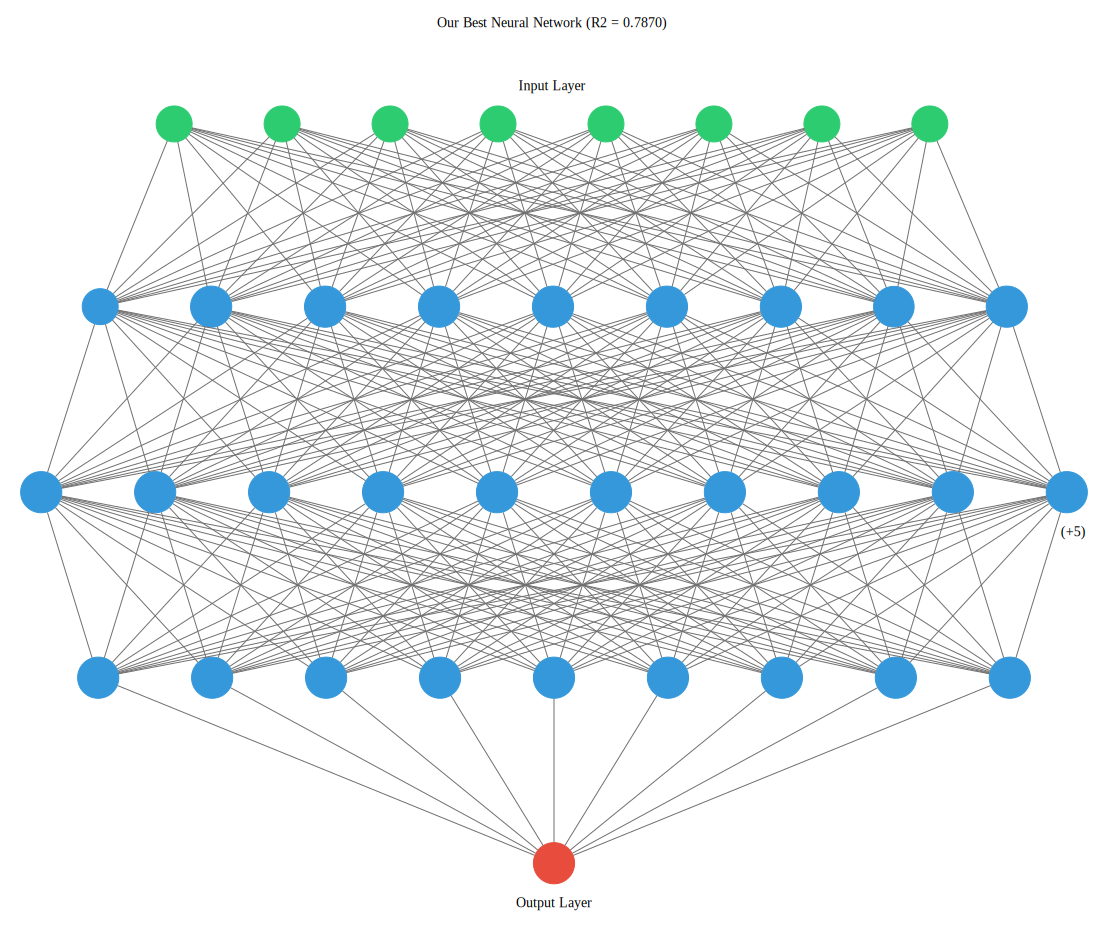

In [ ]:
ann_viz(Simple_Network2_2Exponential_1Softmax, title="Our Best Neural Network (R2 = 0.7870)", filename='network.gv')
Source.from_file('network.gv') 

## KNN Regression

We first try the vanilla KNN regressor.

In [ ]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.7941272428718053

Now, we mess with its hyperparameters.

In [ ]:
hp = {'n_neighbors':np.arange(3,7), 
      'weights': ['uniform', 'distance'], 
      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
      'p': [1, 2]}

for cv in range(3,6):
    grid = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid.score(X_test,y_test)}")
    print(f"Best result {grid.best_params_}")

KNN_Reg1 = grid.best_estimator_

score for 3 fold CV is : 0.8482383869285764
Best result {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
score for 4 fold CV is : 0.8458320265328907
Best result {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
score for 5 fold CV is : 0.846380399743607
Best result {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


Best KNN model has R2 score = 0.8482

**Our current all-time best R2 is 0.8482!**

### Conclusions

We conclude that the KNN regression model trained with the following parameter fits the best:

- Algorithm: brute
- Number of neighbors: 5
- Weights (for each neighboring sample): Distance
- Power of Weights: 1


## Regression Trees

### Simple Regression Tree

Again, we first try the vanilla decision tree regressor.

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.7257734501595341

Now, let's mess with its hyperparameters.

In [ ]:
hp = {'criterion':['mse', 'friedman_mse', 'mae'], 
      'max_depth':np.arange(1,20),
      'splitter': ['best', 'random'], 
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(3,6):
    grid = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid.score(X_test,y_test)}")
    print(f"Best result {grid.best_params_}")

score for 3 fold CV is : 0.7778917980535032
Best result {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
score for 4 fold CV is : 0.7787363930370996
Best result {'criterion': 'mae', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
score for 5 fold CV is : 0.7741438618050575
Best result {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}


Best Simple Regression Tree model has R2 score = 0.7787

The following is the feature importance graph for this model.

0 feature LogGDP 0.603342757966001
1 feature HealthyLifeExpectancy 0.21896482685927346
2 feature PositiveAffect 0.07179405176950687
3 feature SocialSupport 0.054656764823328194
4 feature Generosity 0.022700045283565454
5 feature NegativeAffect 0.01342344694943426
6 feature Freedom 0.01088186155307004
7 feature Corruption 0.004236244795820674


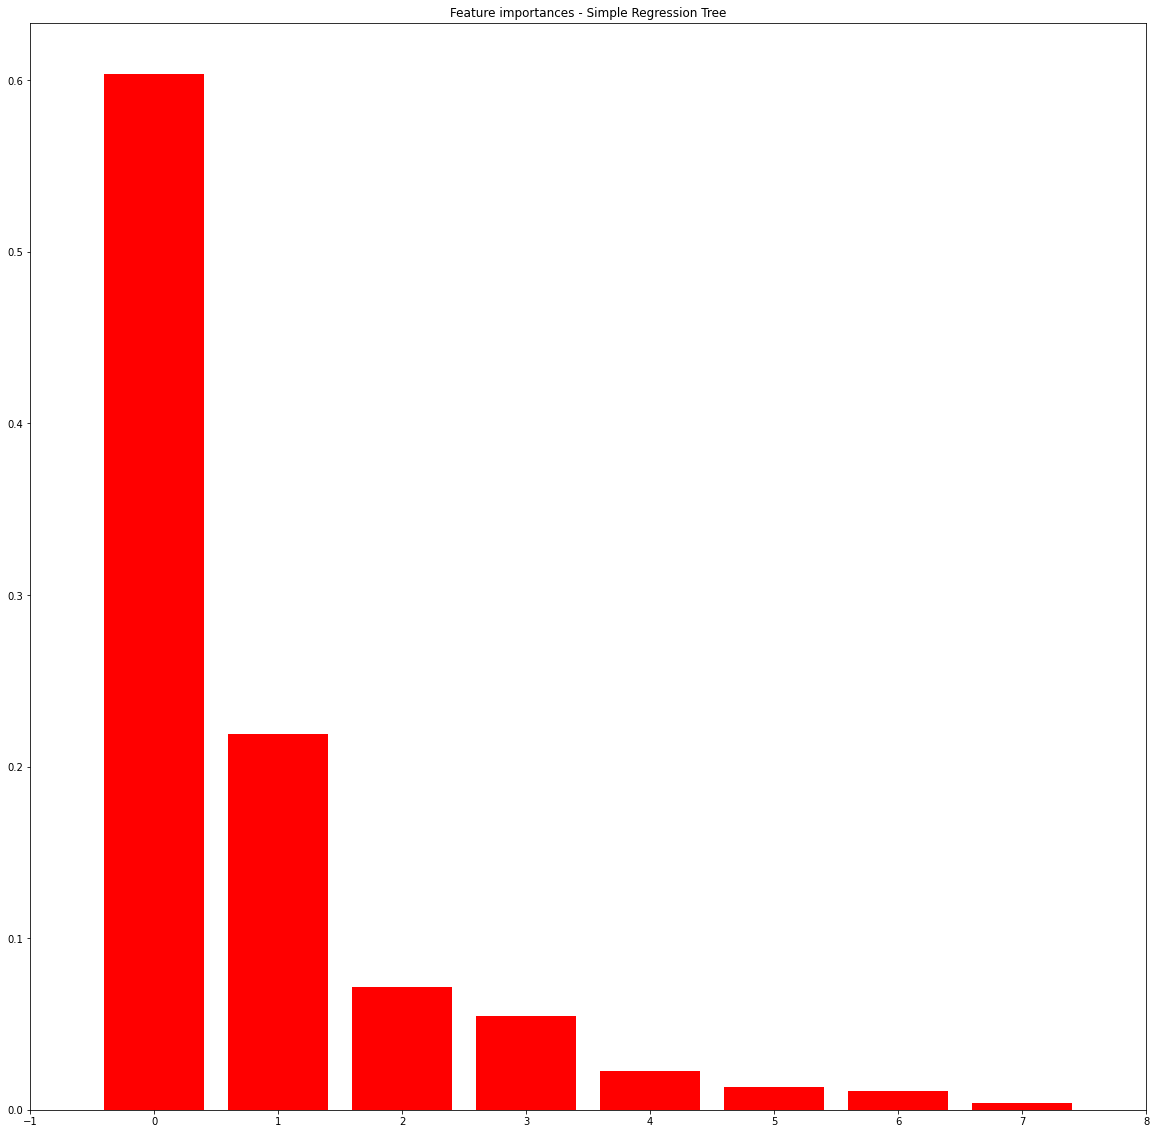

In [ ]:
Reg_Tree1 = grid.best_estimator_

feature_names = list(X_train.columns)

importances = Reg_Tree1.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f} feature {feature_names[indices[f]]} {importances[indices[f]]}')


plt.figure(figsize=(20, 20))
plt.title("Feature importances - Simple Regression Tree")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()

Let's try fitting the model using only the four most important features to minimize any effects of overfitting.

In [ ]:
cols = ['LogGDP','HealthyLifeExpectancy','PositiveAffect','SocialSupport']
X_train_4features = X_train[cols]
X_test_4features = X_test[cols]

hp = {'criterion':['mse', 'friedman_mse', 'mae'], 
      'max_depth':np.arange(1,20),
      'splitter': ['best', 'random'], 
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(3,6):
    grid2 = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid2.fit(X_train_4features,y_train)
    print(f"score for {cv} fold CV is : {grid2.score(X_test_4features,y_test)}")
    print(f"Best result {grid2.best_params_}")

score for 3 fold CV is : 0.7719134018296744
Best result {'criterion': 'mse', 'max_depth': 6, 'max_features': 'sqrt', 'splitter': 'best'}
score for 4 fold CV is : 0.7580979535672164
Best result {'criterion': 'mae', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
score for 5 fold CV is : 0.7746963495268517
Best result {'criterion': 'mse', 'max_depth': 7, 'max_features': 'auto', 'splitter': 'best'}


Looks like we're just anxious. There is no overfitting.

### Random Forest Regression

Now, we spice things up by introducing random regression forests in the hopes that we can fit an even more accurate model.

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
r2_score(y_test, y_pred)

0.8633059896466995

Holy Santa Claus in the North Pole! The vanilla random forest regressor gives a better R2 score than our most complex neural network!

**Our current all-time best R2 is 0.8633!**

Let's be more greedy and see if we can mess with its hyperparameters to make it even better.

In [ ]:
hp = {'criterion':['mse', 'mae'], 
      'n_estimators':np.arange(100, 125),
      'max_depth':np.arange(3, 5),
      'warm_start': [True, False], 
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(3,6):
    grid_forest = GridSearchCV(forest, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid_forest.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid_forest.score(X_test,y_test)}")
    print(f"Best result {grid_forest.best_params_}")

Reg_Forest1 = grid_forest.best_estimator_

score for 3 fold CV is : 0.8058928003510484
Best result {'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 101, 'warm_start': True}
score for 4 fold CV is : 0.8056605727864066
Best result {'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 109, 'warm_start': False}
score for 5 fold CV is : 0.8064781398040592
Best result {'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 114, 'warm_start': False}


Apparently, more tree depth is needed for a good R2 score.

We try again allowing the trees to expand their leaves as much as they can.

In [ ]:
hp = {'criterion':['mse', 'mae'], 
      'n_estimators':np.arange(100, 115),
      'warm_start': [True, False],
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(3,6):
    grid_forest = GridSearchCV(forest, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid_forest.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid_forest.score(X_test,y_test)}")
    print(f"Best result {grid_forest.best_params_}")

Reg_Forest2 = grid_forest.best_estimator_

score for 3 fold CV is : 0.8650438107785299
Best result {'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 113, 'warm_start': True}
score for 4 fold CV is : 0.8650235965735755
Best result {'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 100, 'warm_start': False}
score for 5 fold CV is : 0.86748116373688
Best result {'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 110, 'warm_start': True}


That's better. Best Random Forest model has R2 score = 0.8674

**Our current all-time best R2 is 0.8674!**

The following is the feature importance graph for this model.

0 feature HealthyLifeExpectancy 0.28963400880212714
1 feature LogGDP 0.28142791753335933
2 feature SocialSupport 0.151690113514482
3 feature PositiveAffect 0.10074182048740042
4 feature Freedom 0.07028997879232103
5 feature Corruption 0.0418316314903682
6 feature Generosity 0.034591084536810465
7 feature NegativeAffect 0.02979344484313155


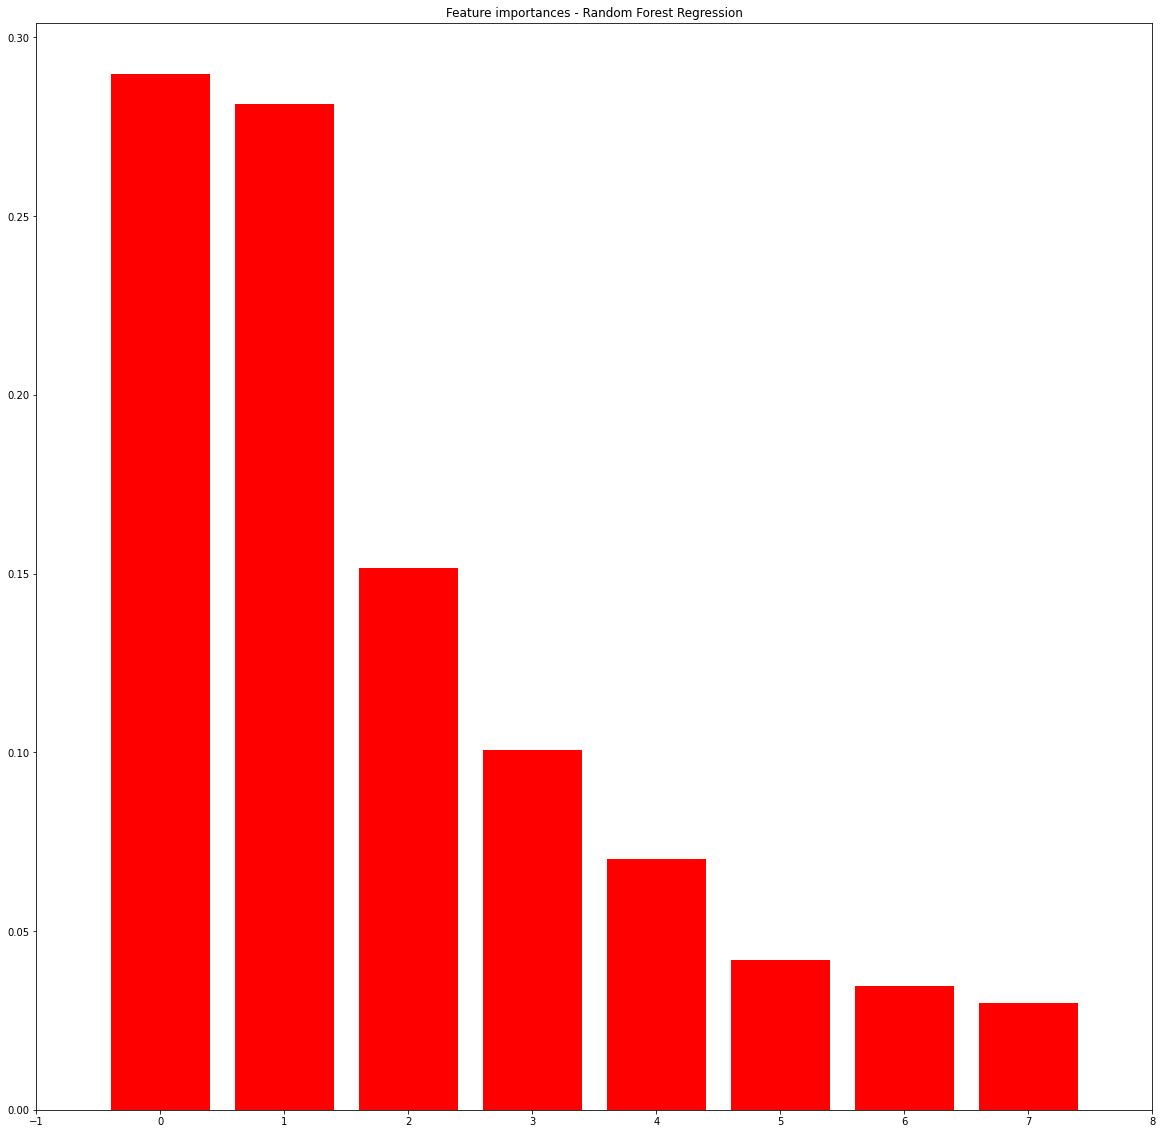

In [ ]:
feature_names = list(X_train.columns)

importances = Reg_Forest2.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f} feature {feature_names[indices[f]]} {importances[indices[f]]}')


plt.figure(figsize=(20, 20))
plt.title("Feature importances - Random Forest Regression")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Boosted Regression Stumps

We use Adaboost Regressor to try and reach an even better ensemble model.

First, run the vanilla Adaboost Regressor.

In [ ]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
r2_score(y_test, y_pred)

0.7961373136441886

And as always, mess with the hyperparameters.

In [ ]:
hp = {'n_estimators': np.arange(20, 120, 10),
      'learning_rate': np.arange(0.2,1.2,0.2),
      'loss': ['linear', 'square', 'exponential']}

for cv in range(3,6):
    grid_ada = GridSearchCV(ada, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid_ada.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid_ada.score(X_test,y_test)}")
    print(f"Best result {grid_ada.best_params_}")

Reg_Ada = grid_ada.best_estimator_

score for 3 fold CV is : 0.7976504355915219
Best result {'learning_rate': 0.6000000000000001, 'loss': 'exponential', 'n_estimators': 20}
score for 4 fold CV is : 0.7977282373433369
Best result {'learning_rate': 0.4, 'loss': 'linear', 'n_estimators': 30}
score for 5 fold CV is : 0.7921843359249773
Best result {'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 110}


Maybe it needs more estimators.

In [ ]:
hp = {'n_estimators': np.arange(120, 220, 10),
      'learning_rate': np.arange(0.2,1.2,0.2),
      'loss': ['linear', 'square', 'exponential']}

for cv in range(3,6):
    grid_ada = GridSearchCV(ada, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid_ada.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid_ada.score(X_test,y_test)}")
    print(f"Best result {grid_ada.best_params_}")

Reg_Ada = grid_ada.best_estimator_

score for 3 fold CV is : 0.7945351680459432
Best result {'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 130}
score for 4 fold CV is : 0.7933549451109465
Best result {'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 130}
score for 5 fold CV is : 0.7987574036364972
Best result {'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 120}


Ok.

Best AdaBoost Regressor model has R2 score = 0.7987

The following is the feature importance graph for this model.

0 feature HealthyLifeExpectancy 0.38653887206200377
1 feature LogGDP 0.31077205203232827
2 feature PositiveAffect 0.10867590951674302
3 feature SocialSupport 0.10192925382934238
4 feature NegativeAffect 0.030254741854905575
5 feature Freedom 0.02674686690751457
6 feature Corruption 0.017927455196102466
7 feature Generosity 0.017154848601059987


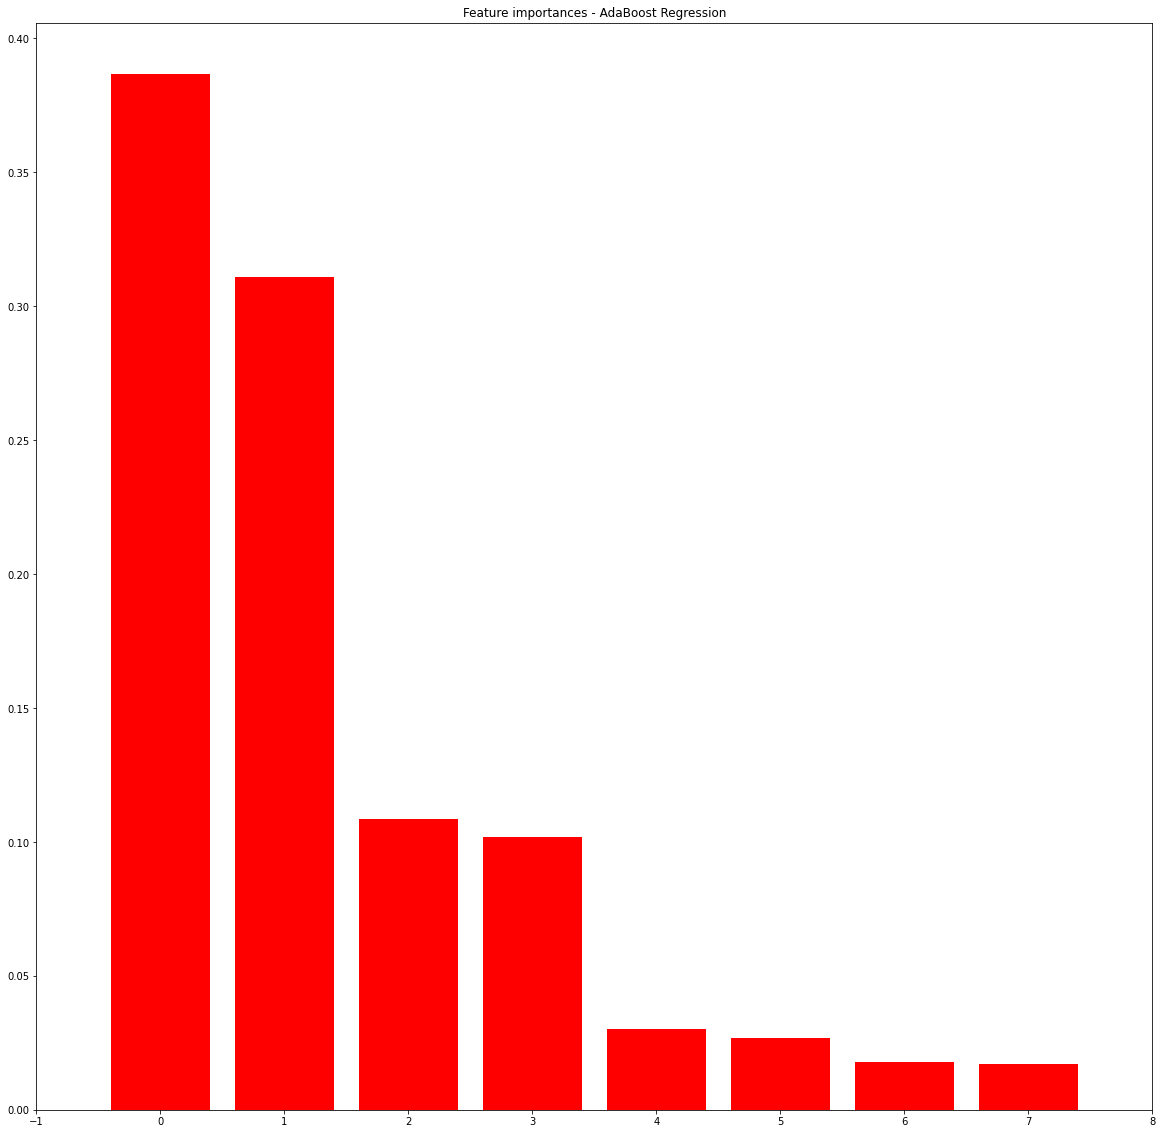

In [ ]:
feature_names = list(X_train.columns)

importances = Reg_Ada.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f} feature {feature_names[indices[f]]} {importances[indices[f]]}')


plt.figure(figsize=(20, 20))
plt.title("Feature importances - AdaBoost Regression")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Conclusions

**Simple Regression Trees**

We conclude that the regression tree trained with the following parameter fits the best (R2 = 0.7787):
- Criterion: Mean Absolute Error (MAE)
- Max Depth: 6
- Max Features: auto (8 for our dataset)
- Splitter: Best

This model gives the highest weights to the following features (in that order):
- LogGDP
- HealthyLifeExpectancy
- PositiveAffect
- SocialSupport



**Random Regression Forests**

We conclude that the random regression forest trained with the following parameter fits the best (R2 = 0.8674):

- Criterion: Mean Squared Error (MSE)
- Max Features: log2 of the total number of features
- Number of Estimators: 110
- Warm Start (Using previous tree solutions as an initial guide): True

This model gives the highest weights to the following features (in that order):
- HealthyLifeExpectancy
- LogGDP
- SocialSupport
- PositiveAffect

**Boosted Regression Stumps**
We conclude that the AdaBoost regressor trained with the following parameter fits the best (R2 = 0.7987):

- Learning Rate: 0.2
- Loss Function: exponential
- Number of Estimators: 120

This model gives the highest weights to the following features (in that order):
- HealthyLifeExpectancy
- LogGDP
- PositiveAffect
- SocialSupport

# Final Results
Although the order in which they are valued tends to vary among our regressors, healthy life expectancy at birth, GDP social support, and positive affect are, according to all our well-performing models, the best predictors of subjective human happiness. We found that these four features vary positively with the happiness ladder. 

Our best-fitting model, the random regression forest, gives the highest values to healthy life expectancy at birth and log GDP and almost half these values to social support and positive affect. Meanwhile, our best performing linear regression models gave the highest values to log GDP. 

Overall, our best performing model is the random forest regressor which uses 110 estimators and yields an R2 score of 0.8674. 


# Resulting Model Evaluation

To ensure that our resulting model does not fail at any specific range of our target feature (the happiness ladder score) or our main predictor features (healthy life expectancy, GDP, social support, and positive affect), we plot the mean square error against each feature. 

To make the plots easier to follow by the eye, we downsample each feature and the corresponding mean squared errors list by 10. 

In [ ]:
forest = RandomForestRegressor(criterion = 'mse', max_features= 'log2', n_estimators= 110, warm_start= True)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
errors = (y_test - y_pred)**2

### Mean square error against the happiness ladder

Text(0, 0.5, 'cumulated mse')

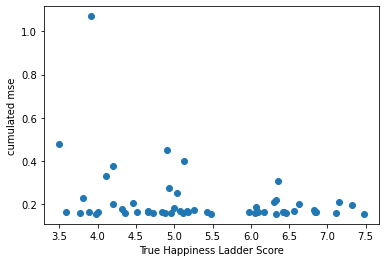

In [ ]:
tup = zip(y_test, errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = y_test.tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("True Happiness Ladder Score")
plt.ylabel("cumulated mse")


### Mean square error against healthy life expectancy

Text(0, 0.5, 'cumulated mse')

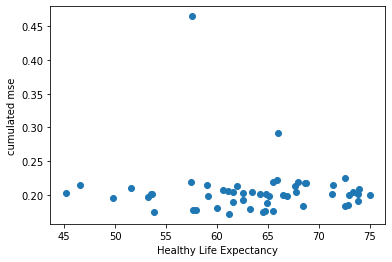

In [ ]:
tup = zip(X_test['HealthyLifeExpectancy'], errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = X_test['HealthyLifeExpectancy'].tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("cumulated mse")

### Mean square error against log GDP

Text(0, 0.5, 'cumulated mse')

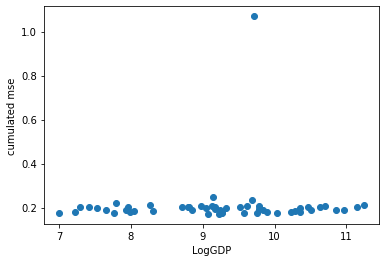

In [ ]:
tup = zip(X_test['LogGDP'], errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = X_test['LogGDP'].tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("LogGDP")
plt.ylabel("cumulated mse")

### Mean square error against social support

Text(0, 0.5, 'cumulated mse')

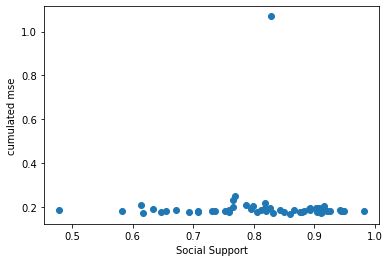

In [ ]:
tup = zip(X_test['SocialSupport'], errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = X_test['SocialSupport'].tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("Social Support")
plt.ylabel("cumulated mse")

### Mean square error against the Positive Affect

Text(0, 0.5, 'cumulated mse')

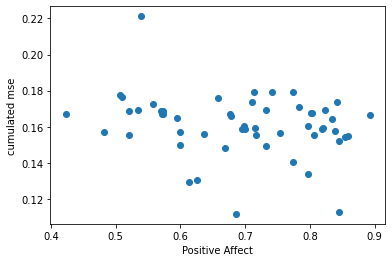

In [ ]:
tup = zip(X_test['PositiveAffect'], errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = X_test['PositiveAffect'].tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("Positive Affect")
plt.ylabel("cumulated mse")

### The above plots show no ill patterns leading us to conclude our model behaves properly across all ranges of our main features. 

# Discussion

While our work yields quite promising results, human happiness is most definitely a goal more intricate than 8 measures of environmental influences. 

For machine learning engineers, many exciting paths are open for investigation. For instance, while the dataset we used was the largest, most comprehensive, and least biased dataset available to us, a future model could make use of a more expansive dataset with additional features including a country’s political condition, the status of its minorities, and the actual economic status of its citizens. We did find some, yet not all, of these features in other surveys, most prominent of which was the World Values Survey (WVS). Unfortunately, the WVS was much too small and had alarmingly many missing values, making too hard the possibility of incorporating it into our WHR dataset. 

In the words of Gautama Buddha, “there is no path to happiness: happiness is the path”. 


# References
[1] https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/ 

[2] https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/

[3] https://keras.io/api/layers/activations/

[4] https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

[5] https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

[6] https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

[7] https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

[8] https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e

